In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis='columns',inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


# Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['Sex']=le_sex.fit_transform(df['Sex'])
df['Embarked']=le_embarked.fit_transform(df['Embarked'])

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [9]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [11]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

# Dealing with the null values

In [12]:
median_age = df['Age'].median(skipna=True)
median_age


np.float64(28.0)

In [13]:
df.fillna(median_age,inplace=True)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# Dividing the data into training and then validation data

In [28]:
X = df.drop('Survived',axis='columns')
Y = df['Survived']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

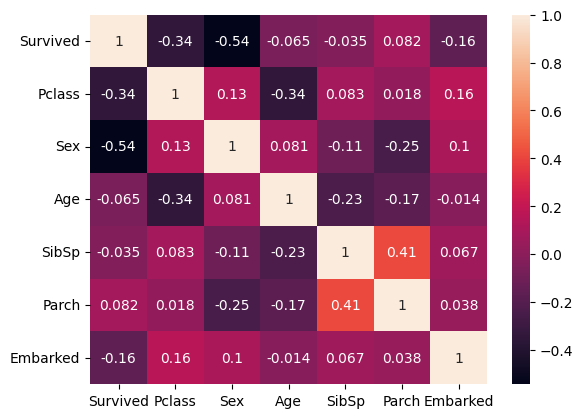

In [30]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()



# Now, training the Decision Tree Model



In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [32]:

X.shape


(891, 6)

In [34]:
Y.shape

(891,)

In [35]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
dec_tree_accuracy = model.score(X_test,Y_test)
print(dec_tree_accuracy*100,    "%")

80.44692737430168 %


# just comparing it to logistic regression accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,Y_train)
log_reg_accuracy = model2.score(X_test,Y_test)
print(log_reg_accuracy*100,    "%")

76.53631284916202 %


c:\Users\Surya Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Surya Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Surya Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this 

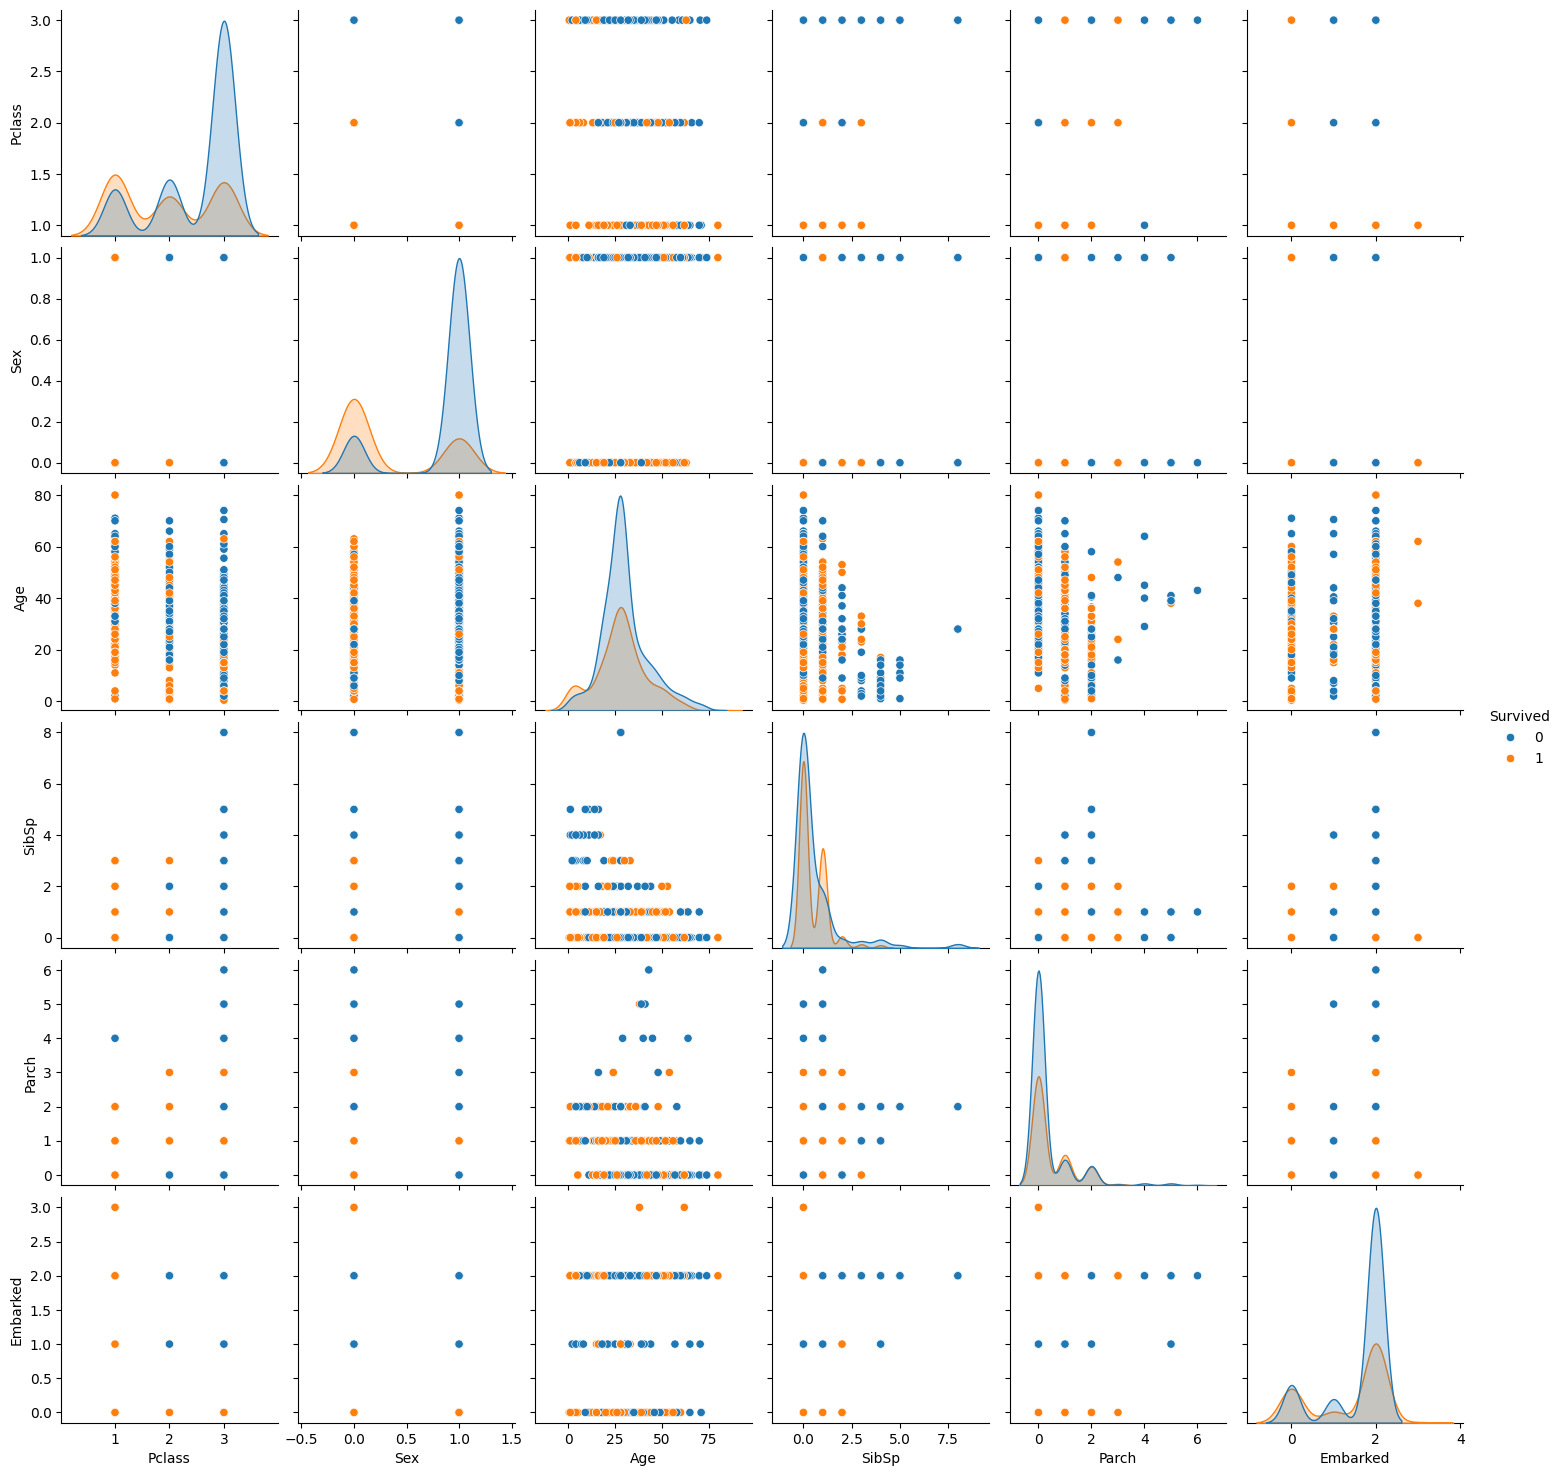

In [ ]:
sns.pairplot(df,kind='scatter',hue='Survived')